In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. 

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc","fConc1", "fAsym", "fM3Long","fM3Trans","fM3Alpha","fDist", "class"]

df = pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fM3Alpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"] == 'g').astype(int) 

In [4]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fM3Alpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


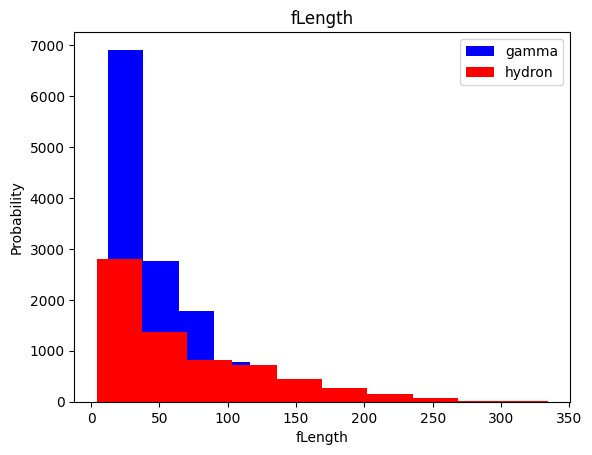

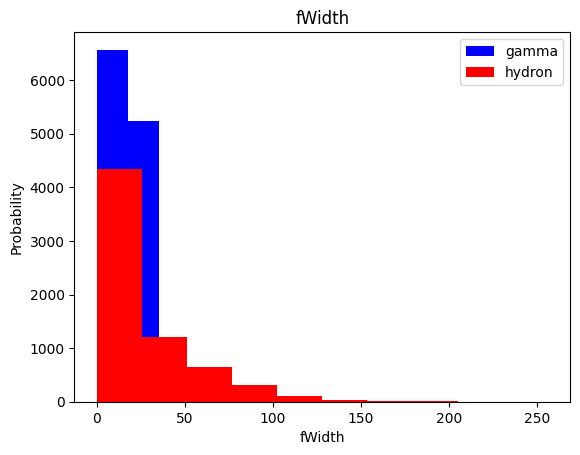

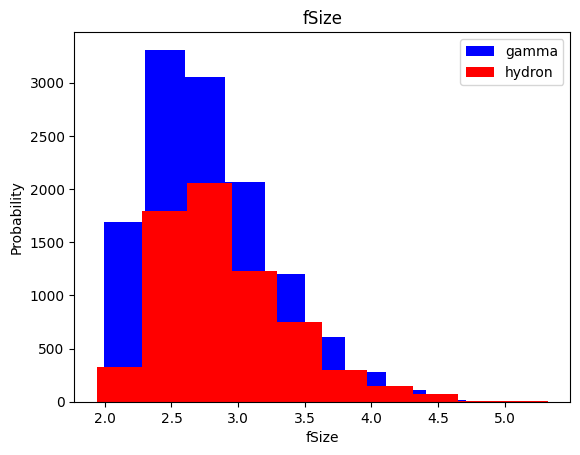

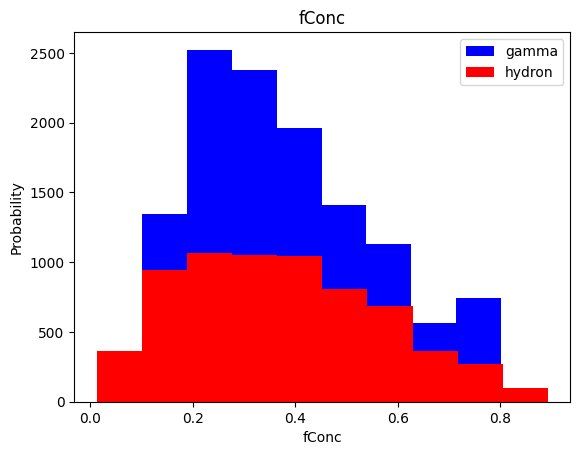

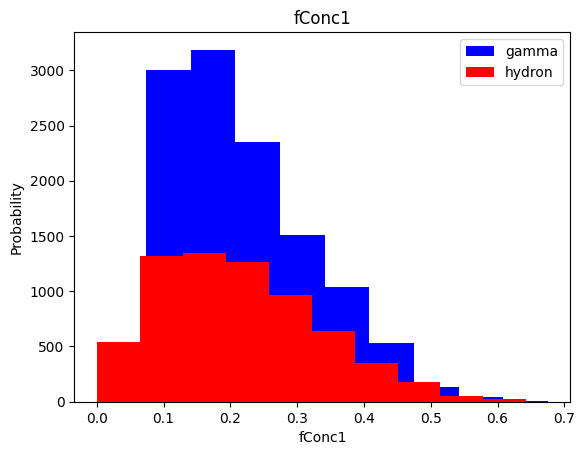

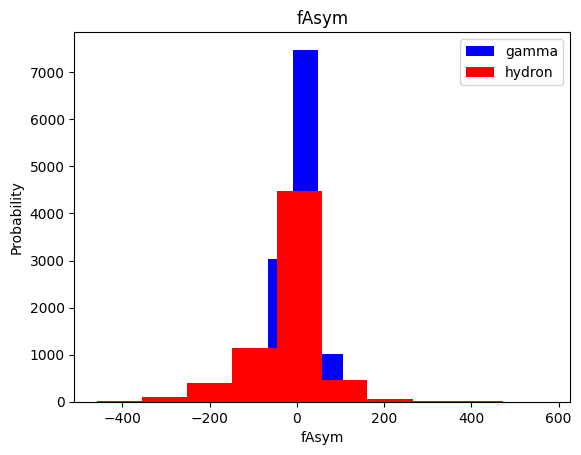

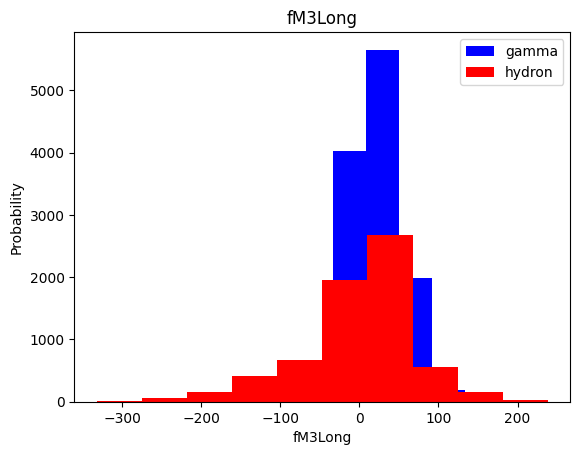

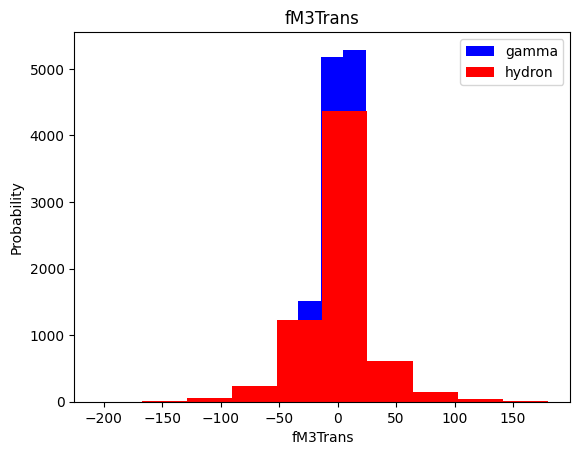

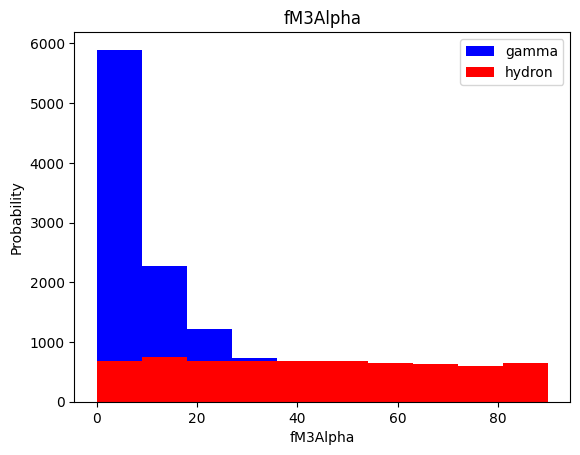

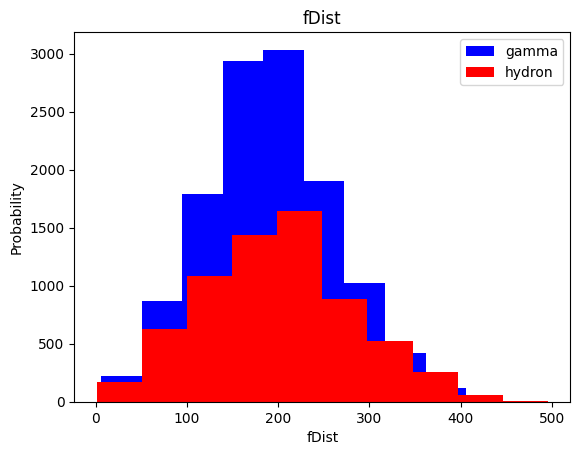

In [5]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label = 'gamma')
    plt.hist(df[df['class']==0][label], color='red', label = 'hydron')
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation and Test Dataset

In [12]:
train,valid,test = np.split(df.sample(frac=1), [int (0.6*len(df)), int(0.8*len(df))])

Basically 60-80% of the length of the dataset will go for validation
like everything from 80-100 is going to be the test data

In [13]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,Y = ros.fit_resample(X,Y)
    data = np.hstack((X,np.reshape(Y,(-1,1))))
    
    return data,X,Y

In [14]:
print(len(train[train['class']==1]))#gamma
print(len(train[train['class']==0]))#hadrons

7324
4088


In [15]:
train, x_train, y_train = scale_dataset(train, oversample=True) 
valid, x_valid, y_valid = scale_dataset(valid, oversample=False) 
test, x_test, y_test = scale_dataset(test, oversample= False)

In [16]:
sum(y_train == 1)

7324

In [17]:
sum(y_train == 0)

7324

In [18]:
len(y_train)

14648